https://www.kaggle.com/datasets/mfaisalqureshi/spam-email

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
spam_data = pd.read_csv("C:\\Users\\PC\\Desktop\\Python\\Dataset\\spam.csv")

In [3]:
spam_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
spam_data.isnull().sum()

Category    0
Message     0
dtype: int64

Text(0.5, 1.0, 'Pie chart')

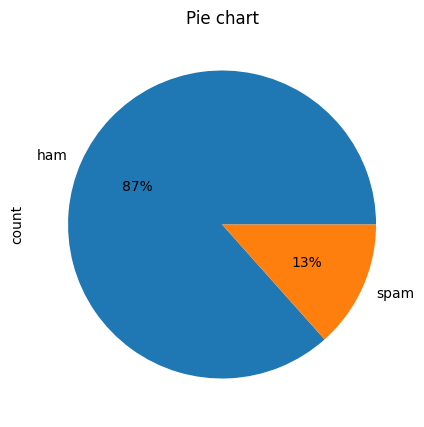

In [6]:
plt.figure(figsize = (5, 5))
spam_data['Category'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Pie chart')

In [7]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [8]:
x = spam_data['Message'].values
y = spam_data['Category'].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state=0)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

In [11]:
cv = CountVectorizer() 
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

In [12]:
print(cv.vocabulary_)

{'no': 4809, 'good': 3196, 'for': 2943, 'the': 6861, 'movie': 4623, 'is': 3769, 'it': 3781, 'ok': 4932, 'if': 3615, 'leave': 4084, 'in': 3661, 'an': 957, 'hourish': 3529, 'you': 7751, 'were': 7502, 'are': 1048, 'free': 2990, 'can': 1625, 'give': 3158, 'otherwise': 5021, 'nalla': 4696, 'adi': 816, 'entey': 2603, 'nattil': 4716, 'kittum': 3977, 'have': 3369, 'emigrated': 2570, 'or': 4993, 'something': 6351, 'maybe': 4423, '30': 432, 'was': 7429, 'bit': 1359, 'hopeful': 3505, 'just': 3899, 'got': 3213, 'home': 3485, 'babe': 1191, 'still': 6524, 'awake': 1169, 'kay': 3926, 'since': 6213, 'we': 7455, 'out': 5028, 'already': 924, 'me': 4428, 'not': 4845, 'workin': 7637, 'once': 4954, 'get': 3132, 'job': 3852, 'what': 7515, 'he': 3379, 'said': 5915, 'matter': 4412, 'my': 4679, 'mind': 4505, 'saying': 5963, 'some': 6341, 'other': 5019, 'there': 6880, 'oh': 4927, 'yeah': 7723, 'and': 961, 'diet': 2305, 'flew': 2891, 'window': 7567, 'sorry': 6374, 'few': 2815, 'things': 6890, 'to': 6981, 'do': 2

In [13]:
model = SVC(random_state = 0)
model.fit(x_train, y_train)

SVC(random_state=0)

In [14]:
model.score(x_test,y_test)

0.9820627802690582

In [17]:
new_email = ['testing email']
new_email_transformed = cv.transform(new_email)
classification = model.predict(new_email_transformed)
print(classification)

['ham']
